In [1]:
import os

if os.getcwd().split('/')[-1] == 'notebooks':
    os.chdir('../working')

In [2]:
import numpyro
numpyro.enable_x64()

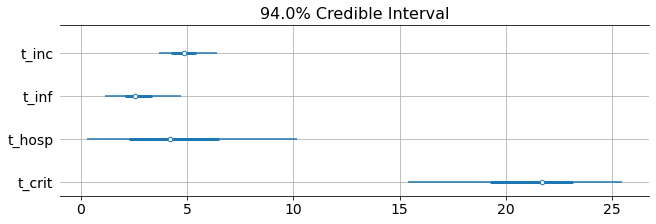

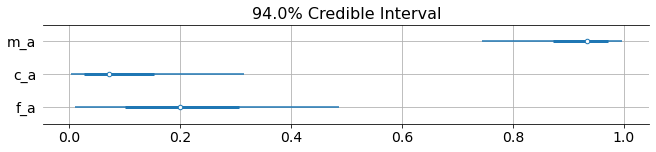

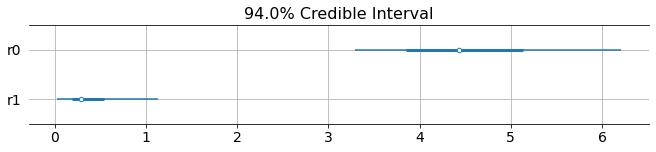

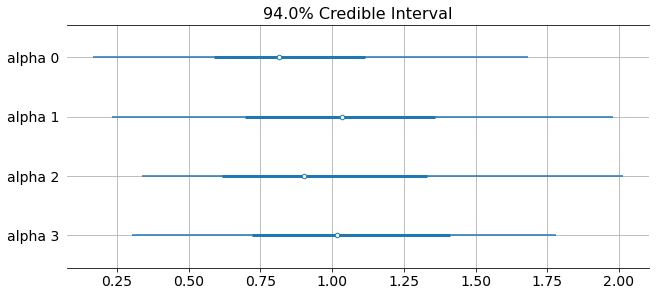

In [3]:
import arviz as az
from postprocess import plot_forest

inference_data = az.convert_to_inference_data('../output/inference/Italy.nc')
plot_forest(inference_data)

In [4]:
from main import *

<ipython-input-4-fd4ba24e61ae>:1: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  from main import *


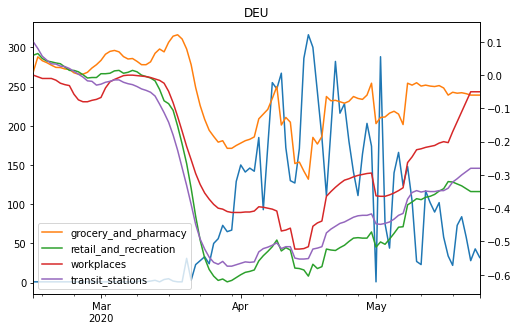

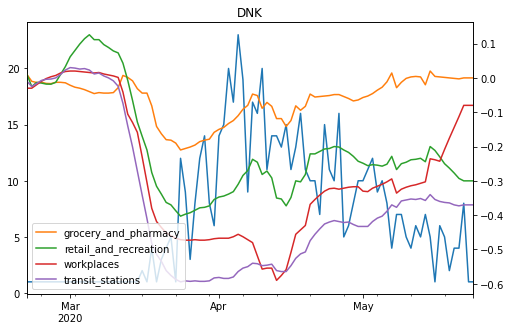

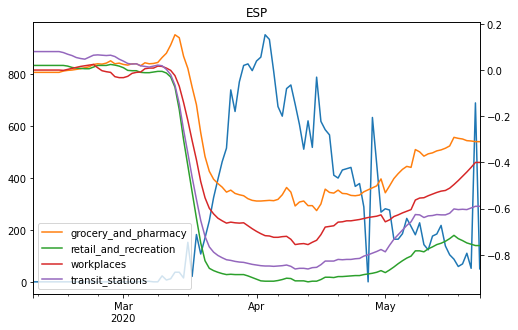

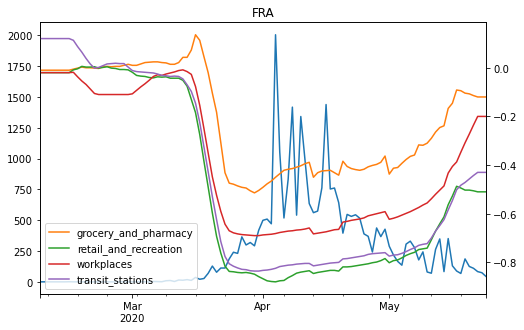

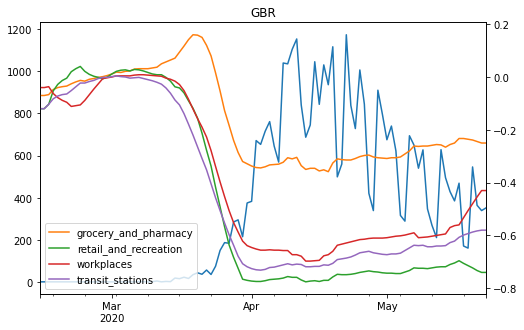

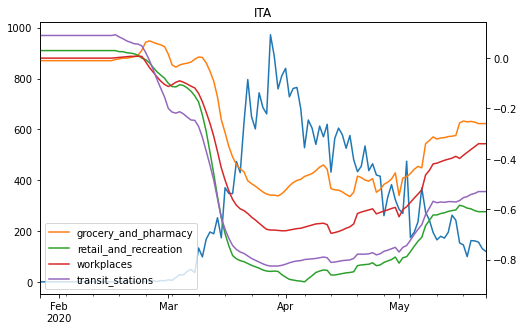

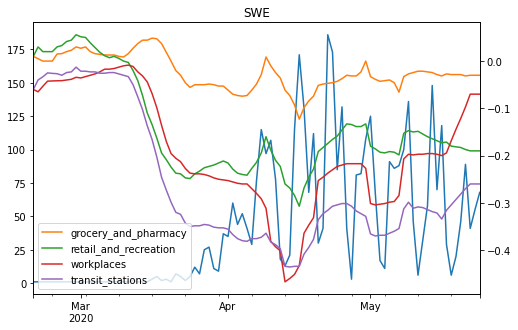

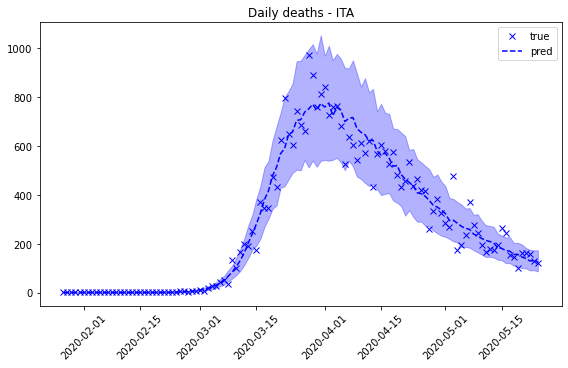

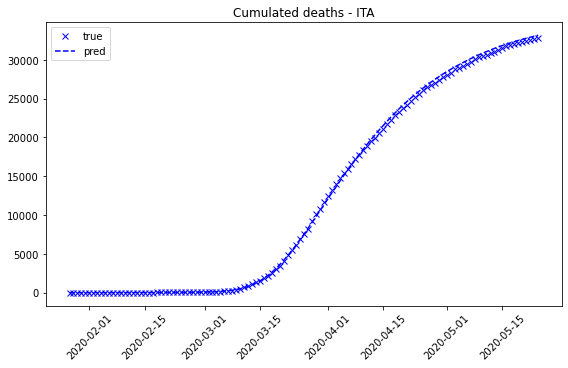

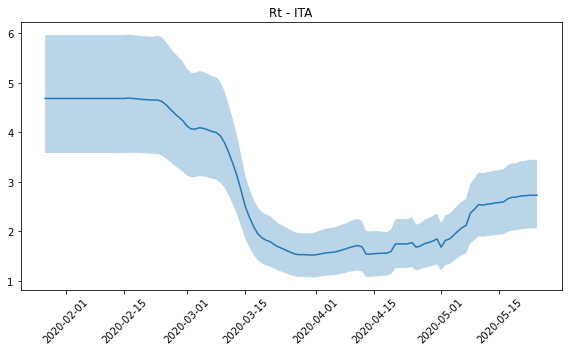

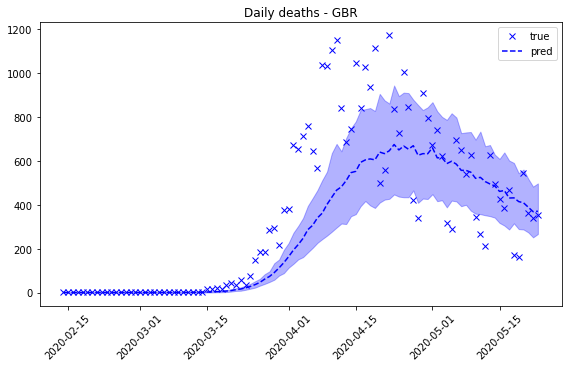

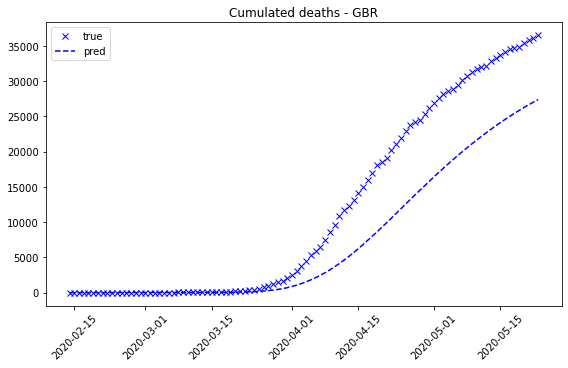

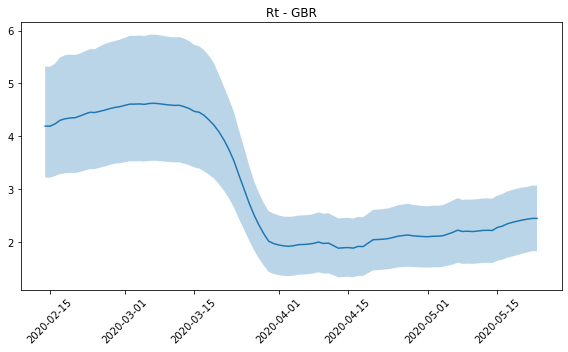

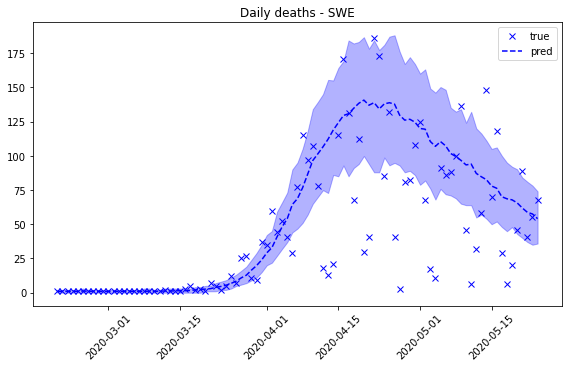

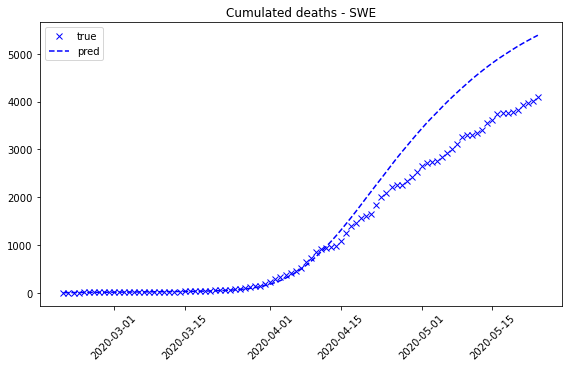

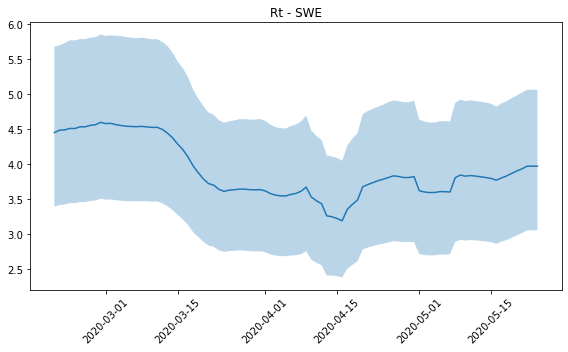

In [5]:
plot_dataset(all_countries, all_mobilities, all_populations, all_deaths, all_times, MOBILITY_CATEGORIES)

posterior_samples = {param: inference_data.posterior[param].values[0] for param in inference_data.posterior.data_vars}
predictive = Predictive(multi_model, posterior_samples)
y_pred = predictive(PRNGKey(2), 
                    all_mobilities=reorder(all_mobilities, mask_train, mask_test), 
                    all_populations=reorder(all_populations, mask_train, mask_test))

plot_results(y_pred, posterior_samples, all_countries, mask_train, 
mask_test, all_times, all_deaths, all_mobilities)